<div class="alert alert-success">    
    <h1 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 40px;">هوش مصنوعی</h1>
    <h2 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 25px;">مجید محبی</h2>
    <h3 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 20px;">دانشکده مهندسی برق و کامپیوتر دانشگاه زنجان</h3>
    <h4 style="direction: rtl;text-align:center;font-family:B Roya;font-size: 18px;">بهار 1404</h4>
</div>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 22px;color:RGB(127,96,0)">

<body> 
پروژه اول: طراحی سیستم زمان‌بندی با الگوریتم تبرید شبیه‌سازی شده (Simulated Annealing)  
</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
نام و نام خانوادگی
<br>

</body> 

</h4>

<h4 style="charset:utf-8; lang:fa-IR; direction: rtl;text-align:right;font-family:B Roya;font-size: 18px;color:RGB(127,96,0)">

<body>
شماره دانشجویی
<br>

</body> 

</h4>

Step 0, Temp: 500.000, Best Conflicts: 40
Step 1, Temp: 497.500, Best Conflicts: 38
Step 2, Temp: 495.012, Best Conflicts: 36
Step 3, Temp: 492.537, Best Conflicts: 30
Step 4, Temp: 490.075, Best Conflicts: 24
Step 5, Temp: 487.624, Best Conflicts: 24
Step 6, Temp: 485.186, Best Conflicts: 24
Step 7, Temp: 482.760, Best Conflicts: 24
Step 8, Temp: 480.347, Best Conflicts: 24
Step 9, Temp: 477.945, Best Conflicts: 24
Step 10, Temp: 475.555, Best Conflicts: 24
Step 11, Temp: 473.177, Best Conflicts: 24
Step 12, Temp: 470.811, Best Conflicts: 24
Step 13, Temp: 468.457, Best Conflicts: 24
Step 14, Temp: 466.115, Best Conflicts: 23
Step 15, Temp: 463.784, Best Conflicts: 21
Step 16, Temp: 461.466, Best Conflicts: 21
Step 17, Temp: 459.158, Best Conflicts: 21
Step 18, Temp: 456.862, Best Conflicts: 21
Step 19, Temp: 454.578, Best Conflicts: 21
Step 20, Temp: 452.305, Best Conflicts: 21
Step 21, Temp: 450.044, Best Conflicts: 21
Step 22, Temp: 447.793, Best Conflicts: 21
Step 23, Temp: 445.55

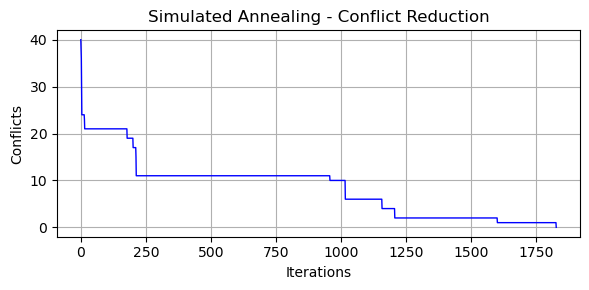


Final Schedule (Conflicts = 0):
D1 -> Wed-10-12 in Room3
D2 -> Mon-14-16 in Room3
D3 -> Sat-10-12 in Room3
D4 -> Wed-14-16 in Room2
D5 -> Mon-12-14 in Room4
D6 -> Wed-12-14 in Room3
D7 -> Wed-12-14 in Room1
D8 -> Sat-08-10 in Room3
D9 -> Sat-12-14 in Room1
D10 -> Wed-10-12 in Room1
D11 -> Mon-08-10 in Room1
D12 -> Sat-08-10 in Room4
D13 -> Sat-14-16 in Room5
D14 -> Wed-14-16 in Room5
D15 -> Mon-16-18 in Room2
D16 -> Wed-14-16 in Room1
D17 -> Sat-16-18 in Room1
D18 -> Wed-16-18 in Room1
D19 -> Sat-14-16 in Room1
D20 -> Mon-10-12 in Room2


In [15]:
import random
import math
import matplotlib.pyplot as plt

NUM_LESSONS = 20
NUM_STUDENTS = 50
NUM_CLASSES = 5

days = ['Sat', 'Mon', 'Wed']
slots_per_day = ['08-10', '10-12', '12-14', '14-16', '16-18']
time_slots = [f"{d}-{s}" for d in days for s in slots_per_day]

classrooms = [{'id': f'Room{i+1}', 'capacity': cap} for i, cap in enumerate([25, 30, 35, 40, 50])]

lessons = []
for i in range(NUM_LESSONS):
    allowed_slots = random.sample(time_slots, k=random.randint(10, 13))
    lessons.append({
        'id': f'D{i+1}',
        'duration': random.choice([1, 1.5, 2]),
        'professor': f'Prof{random.randint(1, 10)}',
        'available_slots': allowed_slots
    })

students = []
all_lessons = [l['id'] for l in lessons]
for i in range(NUM_STUDENTS):
    students.append({
        'id': f'S{i+1}',
        'lessons': random.sample(all_lessons, k=random.randint(3, 6))
    })

def create_random_schedule():
    schedule = {}
    for lesson in lessons:
        ts = random.choice(lesson['available_slots'])
        room = random.choice(classrooms)['id']
        schedule[lesson['id']] = (ts, room)
    return schedule

def calculate_conflicts(schedule):
    time_conflicts = 0
    capacity_conflicts = 0
    room_conflicts = 0
    slot_room_count = {}
    for student in students:
        seen = {}
        for lesson_id in student['lessons']:
            ts, _ = schedule[lesson_id]
            if ts in seen:
                time_conflicts += 1
            seen[ts] = True
    for lesson_id, (ts, room) in schedule.items():
        key = (ts, room)
        if key not in slot_room_count:
            slot_room_count[key] = 0
        slot_room_count[key] += sum(1 for s in students if lesson_id in s['lessons'])
    for (ts, room), count in slot_room_count.items():
        room_cap = next(r['capacity'] for r in classrooms if r['id'] == room)
        if count > room_cap:
            capacity_conflicts += (count - room_cap)
    lesson_map = {}
    for lesson_id, (ts, room) in schedule.items():
        key = (ts, room)
        if key in lesson_map:
            room_conflicts += 1
        else:
            lesson_map[key] = lesson_id
    return time_conflicts + capacity_conflicts + room_conflicts

def get_neighbor(schedule):
    new_schedule = schedule.copy()
    lesson_id = random.choice(list(schedule.keys()))
    lesson_index = int(lesson_id[1:]) - 1
    new_ts = random.choice(lessons[lesson_index]['available_slots'])
    new_room = random.choice(classrooms)['id']
    new_schedule[lesson_id] = (new_ts, new_room)
    return new_schedule

def simulated_annealing():
    T = 500.0
    T_min = 0.001
    alpha = 0.995
    iterations = 5000
    current_schedule = create_random_schedule()
    current_cost = calculate_conflicts(current_schedule)
    best_schedule = current_schedule
    best_cost = current_cost
    costs = []
    for i in range(iterations):
        if T < T_min or best_cost == 0:
            break
        new_schedule = get_neighbor(current_schedule)
        new_cost = calculate_conflicts(new_schedule)
        if new_cost < current_cost or random.uniform(0, 1) < math.exp((current_cost - new_cost) / T):
            current_schedule = new_schedule
            current_cost = new_cost
            if new_cost < best_cost:
                best_schedule = new_schedule
                best_cost = new_cost
        costs.append(best_cost)
        print(f"Step {i}, Temp: {T:.3f}, Best Conflicts: {best_cost}")
        T *= alpha
    return best_schedule, costs

final_schedule, cost_log = simulated_annealing()

plt.figure(figsize=(6, 3))
plt.plot(cost_log, linewidth=1.0, color='blue')
plt.xlabel("Iterations", fontsize=10)
plt.ylabel("Conflicts", fontsize=10)
plt.title("Simulated Annealing - Conflict Reduction", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nFinal Schedule (Conflicts = 0):")
for lesson_id, (ts, room) in final_schedule.items():
    print(f"{lesson_id} -> {ts} in {room}")
